In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data = pd.read_csv("Student_Performance.csv")



In [3]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


- **Hours Studied**: Количество часов, потраченных на изучение материала.
- **Previous Scores**: Предыдущие баллы или оценки студента.
- **Extracurricular Activities**: Участие во вне классных занятиях (да/нет).
- **Sleep Hours**: Количество часов сна студента.
- **Sample Question Papers Practiced**: Количество решенных тренировочных тестов.



- **Performance Index**: Индекс производительности или успеваемости студента.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
data.shape

(10000, 6)

In [7]:
#Это деление позволяет вычислить долю пропущенных значений в каждом столбце относительно общего количества строк.

In [8]:
data.isna().sum() / data.shape[0]

Hours Studied                       0.0
Previous Scores                     0.0
Extracurricular Activities          0.0
Sleep Hours                         0.0
Sample Question Papers Practiced    0.0
Performance Index                   0.0
dtype: float64

In [9]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [10]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [11]:
data.describe(include = object)

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


Мы видим, что :

В наборе данных нет пропущенных значений,
в наборе данных нет дубликатов

## Одномерный анализ и визуализация ##

In [14]:
def count_plot(column_name, hue=None, rotation=0):
    """
    Создает count plot для указанного столбца.
    """
    graph = sns.countplot(x=column_name, data=data, hue=hue, order=data[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)
    plt.xticks(rotation=rotation)
    plt.show()


In [15]:
def box_plot(x_axis=None, y_axis=None, hue=None, col=None):
    """
    Создает box plot для анализа распределения данных.
    """
    sns.catplot(x=x_axis, y=y_axis, data=data, hue=hue, kind="box", col=col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

In [16]:
# смотрим уникальные значения

In [17]:
data["Hours Studied"].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9], dtype=int64)

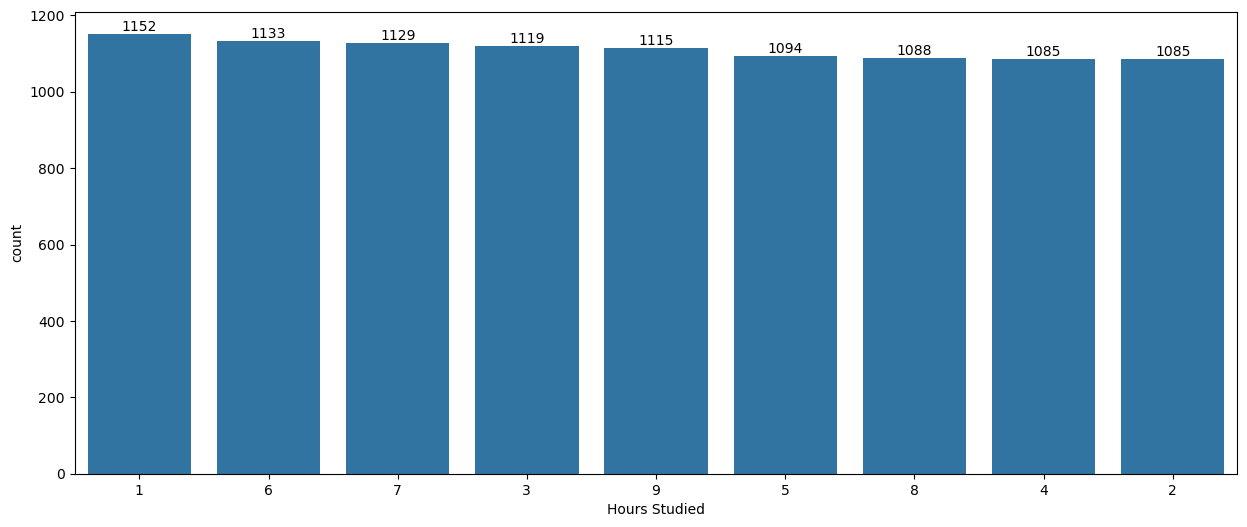

In [18]:
plt.figure(figsize = (15,6))
count_plot(column_name = "Hours Studied")

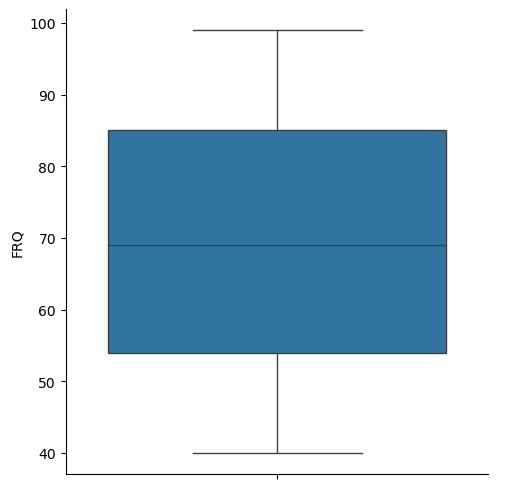

In [19]:
box_plot(y_axis = "Previous Scores")

In [20]:
#50 % учащихся набрали больше 65 баллов


In [21]:
data["Extracurricular Activities"].unique()

array(['Yes', 'No'], dtype=object)

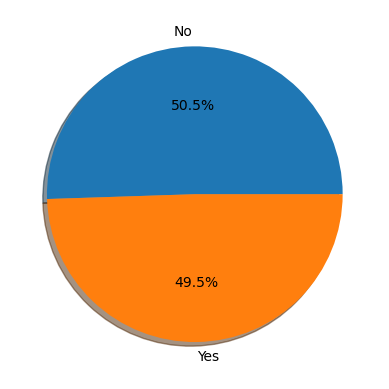

In [22]:
plt.pie(data["Extracurricular Activities"].value_counts(), labels = data["Extracurricular Activities"].value_counts().index, 
        shadow = True, autopct = "%1.1f%%")
plt.show()

In [23]:
#Примерно половина студентов участвует в extracurricular activities, а другая половина — нет.

In [24]:
data["Sleep Hours"].unique()

array([9, 4, 7, 5, 8, 6], dtype=int64)

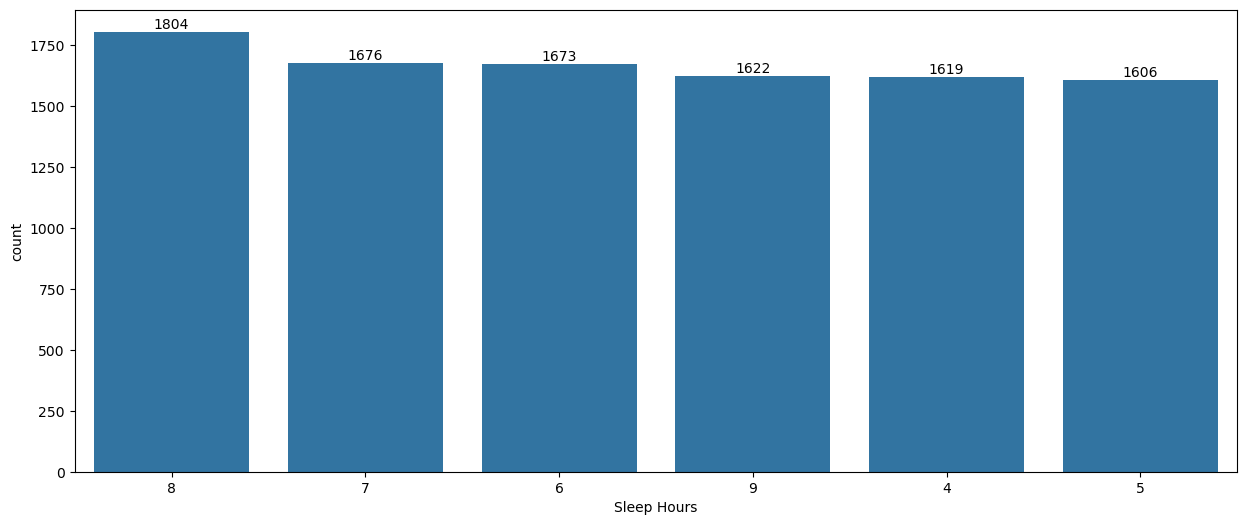

In [25]:
plt.figure(figsize = (15,6))
count_plot(column_name = "Sleep Hours")

In [26]:
data["Sample Question Papers Practiced"].unique()

array([1, 2, 5, 6, 0, 8, 3, 4, 9, 7], dtype=int64)

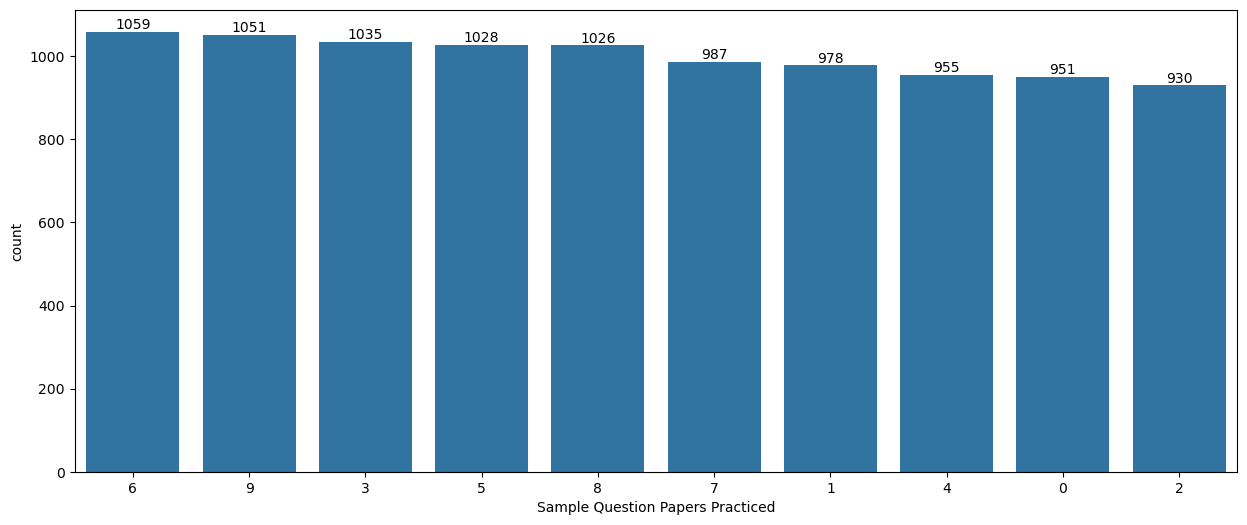

In [27]:
plt.figure(figsize = (15,6))
count_plot(column_name = "Sample Question Papers Practiced")

In [28]:
# Мы можем увидеть что распределение студентов примерно равное, есть студенты которые решили 0 тестов

## Двумерный анализ и визуализация


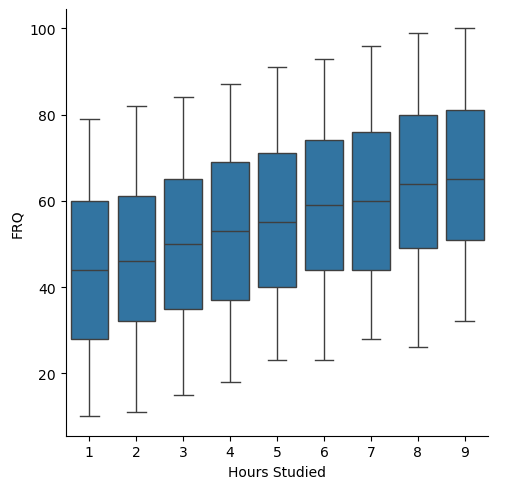

In [30]:
#распределение "отработанных часов" и "показателя успеваемости"
box_plot(x_axis = "Hours Studied", y_axis = "Performance Index")

In [31]:
#Видно, что с увеличением количества часов, потраченных на изучение, индекс производительности в целом увеличивается.
#Это может указывать на положительную корреляцию между этими переменными.

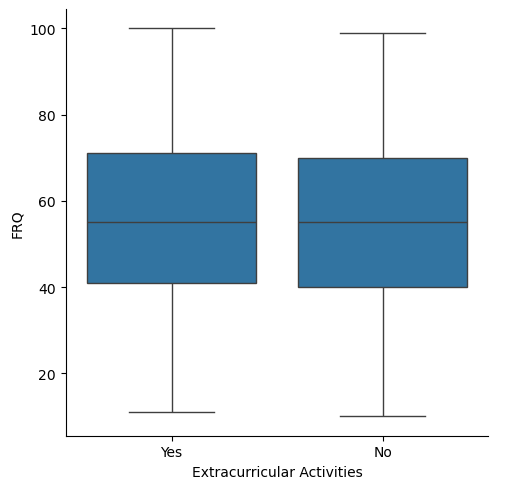

In [32]:
#распределение "внеклассных занятий" и "Индекса успеваемости"
box_plot(x_axis = "Extracurricular Activities", y_axis = "Performance Index")


In [33]:
#Участие во внеклассных мероприятиях в очень малой степени помогает получать высокие оценки

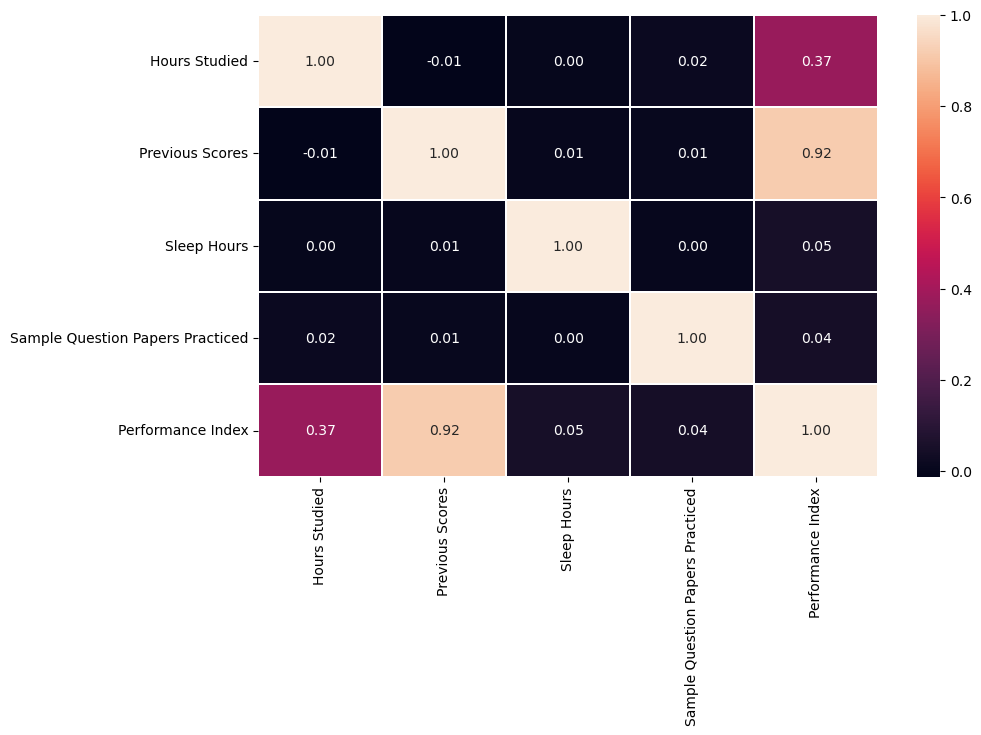

In [34]:
plt.figure(figsize = (10,6))
sns.heatmap(data.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

## Наиболее сильная связь наблюдается между Previous Scores и Performance Index. 
## Это может указывать на то, что предыдущая успеваемость студента является важным фактором для текущей успеваемости.

## Hours Studied также имеет умеренную положительную связь с Performance Index, что подчеркивает важность времени, уделяемого на изучение.

## Sleep Hours и Sample Question Papers Practiced практически не влияют на Performance Index, что может указывать на то, что эти факторы менее значимы для успеваемости в данном наборе данных.

## Предварительная обработка данных

In [80]:
X = data.drop(columns=['Performance Index', 'Sleep Hours', 'Sample Question Papers Practiced', 'Extracurricular Activities'])
y = data['Performance Index']

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)


Размер обучающей выборки: (7000, 2)
Размер тестовой выборки: (3000, 2)


## Обучение

In [128]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train,y_train)
print(model1.score(X_test, y_test))
predict = np.round(model1.predict(X_test), decimals = 1)
pd.DataFrame({"Реальный результат" : y_test, "Предсказанный результат" : predict})

0.9859445764337783


,Реальный результат,Предсказанный результат
6252,51.0,54.8
4684,20.0,22.9
1731,46.0,47.4
4742,28.0,30.3
4521,41.0,44.3
...,...,...
8014,32.0,30.3
1074,40.0,37.1
3063,33.0,33.5
6487,69.0,66.4


In [130]:
from sklearn.neighbors import KNeighborsRegressor

model2 = KNeighborsRegressor(n_neighbors=5)
model2.fit(X_train,y_train)
print(model2.score(X_test, y_test))
predict = np.round(model2.predict(X_test), decimals = 1)
pd.DataFrame({"Реальный результат" : y_test, "Предсказанный результат" : predict})

0.9831378929076763


,Реальный результат,Предсказанный результат
6252,51.0,56.6
4684,20.0,23.0
1731,46.0,47.6
4742,28.0,30.0
4521,41.0,44.2
...,...,...
8014,32.0,30.0
1074,40.0,36.4
3063,33.0,34.0
6487,69.0,66.8


In [132]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor()
model3.fit(X_train,y_train)
print(model3.score(X_test, y_test))
predict = np.round(model3.predict(X_test), decimals = 1)
pd.DataFrame({"Реальный результат" : y_test, "Предсказанный результат" : predict})

0.9849543312603463


,Реальный результат,Предсказанный результат
6252,51.0,55.8
4684,20.0,22.2
1731,46.0,47.7
4742,28.0,29.3
4521,41.0,44.0
...,...,...
8014,32.0,29.3
1074,40.0,37.3
3063,33.0,33.4
6487,69.0,66.7


## Сравнение моделей

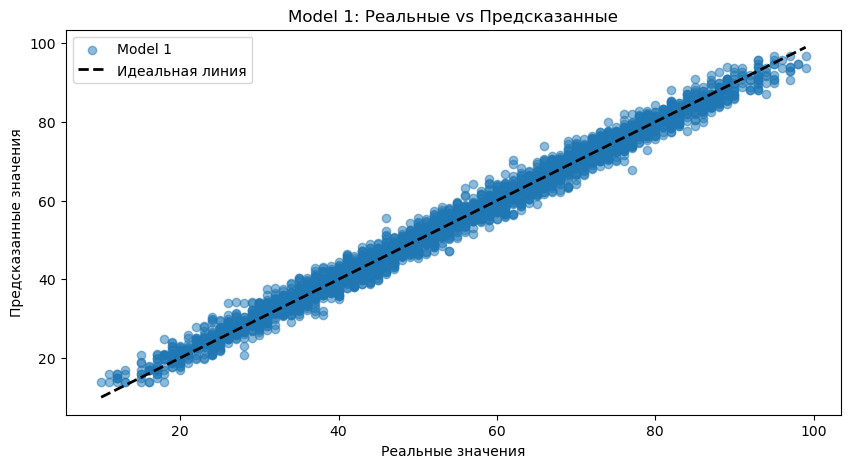

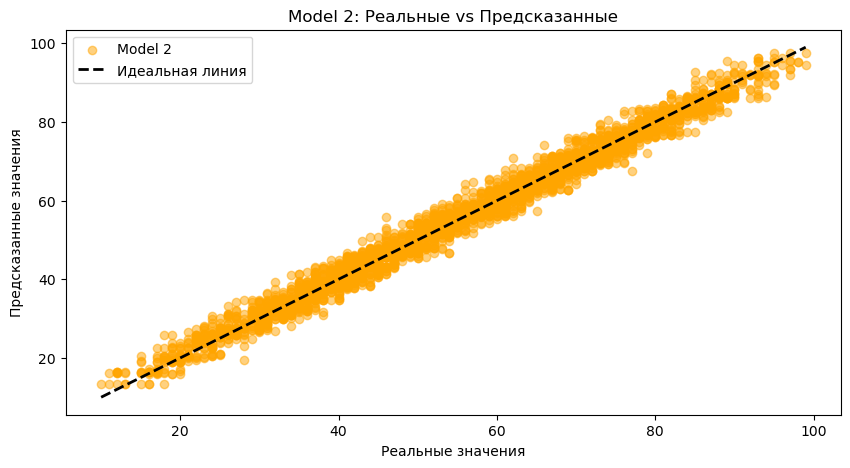

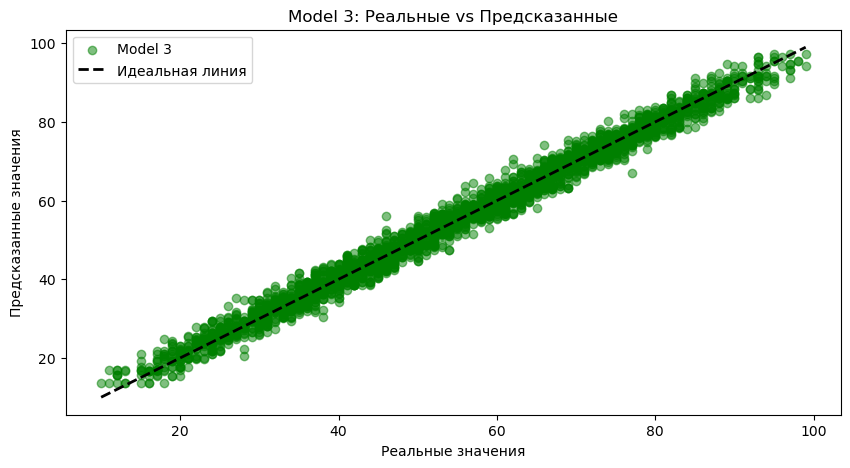

In [140]:
predict1 = np.round(model1.predict(X_test), decimals=1)
predict2 = np.round(model2.predict(X_test), decimals=1)
predict3 = np.round(model3.predict(X_test), decimals=1)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, predict1, alpha=0.5, label="Model 1")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Идеальная линия")
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Model 1: Реальные vs Предсказанные')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, predict2, alpha=0.5, label="Model 2", color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Идеальная линия")
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Model 2: Реальные vs Предсказанные')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, predict3, alpha=0.5, label="Model 3", color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Идеальная линия")
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Model 3: Реальные vs Предсказанные')
plt.legend()
plt.show()

In [145]:
from sklearn.metrics import mean_absolute_error

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

mae1 = mean_absolute_error(y_test, y_pred1)
mae2 = mean_absolute_error(y_test, y_pred2)
mae3 = mean_absolute_error(y_test, y_pred3)

print("Model 1 - Средняя абсолютная ошибка (MAE):", mae1)
print("Model 2 - Средняя абсолютная ошибка (MAE):", mae2)
print("Model 3 - Средняя абсолютная ошибка (MAE):", mae3)

Model 1 - Средняя абсолютная ошибка (MAE): 1.8101437492369956
Model 2 - Средняя абсолютная ошибка (MAE): 1.9751333333333332
Model 3 - Средняя абсолютная ошибка (MAE): 1.8695052603664237


## Вывод по работе
### В этой работе мы проанализировали данные об успеваемости студентов и сделали выводы о том какие факторы больше всего влияют на их успехи.

### Модели: Мы попробовали три модели для предсказания успеваемости: LinearRegression, KNeighborsRegressor и RandomForestRegressor. Лучше всего справился LinearRegression(его ошибка была около 1.81).

## Итог: Главный вывод — чтобы хорошо учиться, нужно больше времени тратить на учебу и стараться получать высокие баллы на предыдущих этапах. А вот участие во вне классных занятиях и сон, хоть и важны для здоровья, на оценки почти не влияют.